# **Entrenamiento con datagen**

Emplearemos los mismos modelos que en el caso de modelos básicos, con la diferencia de que esta vez emplearemos la técnica de datagen para aumentar la cantidad de datos disponibles a la hora de entrenar.

## **Importar dataset**

In [ ]:
import kagglehub    # Libreria para la descarga de archivos de kaggle.

# Download latest version.
path = kagglehub.dataset_download("gpiosenka/railway-track-fault-detection-resized-224-x-224")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/railway-track-fault-detection-resized-224-x-224


## **Directorios**

In [ ]:
# Necesitaremos la librería os, que nos permite interactuar con el sistema operativo y manipular rutas.
import os

# Directorio de entrenamiento:
train_dir = os.path.join(path, 'train')
# Directorio de pruebas:
test_dir = os.path.join(path, 'test')
# Directorio de validacion:
valid_dir = os.path.join(path, 'valid')

## **Importar modelos**

In [ ]:
# Los modelos pre-entrenados se encontrarán en la librería de tensorflow.
import tensorflow as tf

# Aprovechamos para fijar la semilla y evitar la aleatoriedad entre simulaciones.
import os
import random
import numpy as np

# Fijar semillas
Semilla = 42
os.environ['PYTHONHASHSEED'] = str(Semilla) # Controlamos la aleatoridad en el hashing de objetos.
random.seed(Semilla)                        # Controlamos la aleatoridad en la generación de números aleatorios.
np.random.seed(Semilla)                     # Controlamos la aleatoridad en la generación de números aleatorios en numpy.
tf.random.set_seed(Semilla)                 # Controlamos la aleatoridad en la generación de números aleatorios en tensorflow.

# Configurar comportamiento determinista en TensorFlow
os.environ['TF_DETERMINISTIC_OPS'] = '1'    # Configuramos una variable de entorno destinada a ciertas operaciones no deterministas como deterministas.

### VGG16

In [ ]:
VGG16_Base = (tf.keras.applications.VGG16(include_top=False,          # Eliminamos su clasificador.
                                          weights='imagenet',         # Mantenemos los pesos de cada capa.
                                          input_shape=(224, 224, 3))) # Especificamos el tamaño de los datos de entrada.

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in VGG16_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
VGG16_Base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### VGG19

In [ ]:
VGG19_Base = (tf.keras.applications.VGG19(include_top=False,
                                          weights='imagenet',
                                          input_shape=(224, 224, 3)))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in VGG19_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
VGG19_Base.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

### NasNetLarge

In [ ]:
NasNetLarge_Base = (tf.keras.applications.NASNetLarge(include_top=False,
                                                      weights='imagenet',
                                                      input_shape=(224, 224, 3)))

343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in NasNetLarge_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
NasNetLarge_Base.summary()

Model: "nasnet_large"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv1 (Conv2D) │ (None, 111, 111,  │      2,592 │ input_layer_2[0]… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn1            │ (None, 111, 111,  │        384 │ stem_conv1[0][0]  │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_conv_1_s… │ (None, 111, 111,  │      4,032 │ activation[0][0]  │
│ (Conv2D)            │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reduction_bn_1_ste… │ (None, 111, 111,  │        168 │ reduction_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 111, 111,  │          0 │ reduction_bn_1_s… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 111, 111,  │          0 │ stem_bn1[0][0]    │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 115, 115,  │          0 │ activation_1[0][… │
│ (ZeroPadding2D)     │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_p… │ (None, 117, 117,  │          0 │ activation_3[0][… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      2,814 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_r… │ (None, 56, 56,    │      8,736 │ separable_conv_1… │
│ (SeparableConv2D)   │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_1_b… │ (None, 56, 56,    │        168 │ separable_conv_1… │
│ (BatchNormalizatio… │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 56, 56,    │          0 │ separable_conv_1… │
│ (Activation)        │ 42)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv_2_r… │ (None, 56, 56,    │      2,814 │ activation_2[0][

 Total params: 84,916,818 (323.93 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 84,916,818 (323.93 MB)

### InceptionResNetV2

In [ ]:
InceptionResNetV2_Base = (tf.keras.applications.InceptionResNetV2(include_top=False,
                                                                  weights='imagenet',
                                                                  input_shape=(224, 224, 3)))

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in InceptionResNetV2_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
InceptionResNetV2_Base.summary()

Model: "inception_resnet_v2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_260      │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation_260[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_261      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_261[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_262      │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_262[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_263      │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_263[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_264      │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 54,336,736 (207.28 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 54,336,736 (207.28 MB)

### ResNet50

In [ ]:
ResNet50_Base = (tf.keras.applications.ResNet50(include_top=False,
                                                weights='imagenet',
                                                input_shape=(224, 224, 3)))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in ResNet50_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
ResNet50_Base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

### Xception

In [ ]:
Xception_Base = (tf.keras.applications.Xception(include_top=False,
                                                weights='imagenet',
                                                input_shape=(224, 224, 3)))

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Congelamos el modelo.
for layer in Xception_Base.layers:
  layer.trainable = False

In [ ]:
# Visualizamos el modelo completo.
Xception_Base.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_203 (Conv2D) │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_203[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add_4[0][0]     

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

## **Entrenamiento**

### Datos de entrada

In [ ]:
# Importamos la clase ImageDataGenerator contenido en Keras.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Definimos las operaciones que se realizarán para data augmentation.
train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalizamos los datos.
    shear_range=0.2,            # Ángulo de corte máximo de 2º.
    zoom_range=0.3,             # Zoom de hasta un 30%.
    horizontal_flip=True,       # Flip en el eje horizontal.
    vertical_flip=True,         # Flip en el eje vertical.
    width_shift_range=0.3,      # Desplazamiento horizontal de hasta 30%.
    height_shift_range=0.2,     # Desplazamiento vertical de hasta 20%.
    brightness_range=[0.4,1.5]) # Ajuste del brillo en la imagen.

# Es importante que los generadores de validación y de prueba solo reciban reescalado.
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Definimos los generadores para cada uno de los conjuntos.
train_generator = train_datagen.flow_from_directory(
    train_dir,                 # Directorio de datos original.
    batch_size=32,             # Cantidad de datos por iteración.
    class_mode='categorical',  # Tipo categórico (defectuoso y no defectuoso).
    color_mode="rgb",          # Escala de colores.
    target_size=(224, 224),    # Tamaño de los datos a la salida.
    subset='training'          # Nombre del subset originado.
)
validation_generator = validation_datagen.flow_from_directory(
    valid_dir,                 # Directorio de datos original.
    batch_size=32,             # Cantidad de datos por iteración.
    class_mode='categorical',  # Tipo categórico (defectuoso y no defectuoso).
    color_mode="rgb",          # Escala de colores.
    target_size=(224, 224),    # Tamaño de los datos a la salida.
    shuffle=False              # Mezcla de los datos.
)
test_generator = test_datagen.flow_from_directory(
    test_dir,                  # Directorio de datos original.
    batch_size=32,             # Cantidad de datos por iteración.
    class_mode='categorical',  # Tipo categórico (defectuoso y no defectuoso).
    color_mode="rgb",          # Escala de colores.
    target_size=(224, 224),    # Tamaño de los datos a la salida.
    shuffle=False              # Mezcla de los datos.
)

Found 299 images belonging to 2 classes.
Found 62 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


### Modelo VGG16

In [ ]:
# Creamos un modelo nuevo.
VGG16_dg = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
VGG16_dg.add(VGG16_Base)

# Añadimos el clasificador categórico.
VGG16_dg.add(tf.keras.layers.Flatten())
VGG16_dg.add(tf.keras.layers.Dense(500, activation='relu'))
VGG16_dg.add(tf.keras.layers.Dense(200, activation='relu'))
VGG16_dg.add(tf.keras.layers.Dropout(0.3))
VGG16_dg.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
VGG16_dg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    12,544,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,359,790 (104.37 MB)

 Trainable params: 12,645,102 (48.24 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Modelo VGG19

In [ ]:
# Creamos un modelo nuevo.
VGG19_dg = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
VGG19_dg.add(VGG19_Base)

# Añadimos el clasificador categórico.
VGG19_dg.add(tf.keras.layers.Flatten())
VGG19_dg.add(tf.keras.layers.Dense(500, activation='relu'))
VGG19_dg.add(tf.keras.layers.Dense(200, activation='relu'))
VGG19_dg.add(tf.keras.layers.Dropout(0.3))
VGG19_dg.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
VGG19_dg.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │    12,544,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,669,486 (124.62 MB)

 Trainable params: 12,645,102 (48.24 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

### Modelo NASNetLarge

In [ ]:
# Creamos un modelo nuevo.
NasNetLarge_dg = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
NasNetLarge_dg.add(NasNetLarge_Base)

# Añadimos el clasificador categórico.
NasNetLarge_dg.add(tf.keras.layers.Flatten())
NasNetLarge_dg.add(tf.keras.layers.Dense(500, activation='relu'))
NasNetLarge_dg.add(tf.keras.layers.Dense(200, activation='relu'))
NasNetLarge_dg.add(tf.keras.layers.Dropout(0.3))
NasNetLarge_dg.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
NasNetLarge_dg.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ nasnet_large (Functional)       │ (None, 7, 7, 4032)     │    84,916,818 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 197568)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │    98,784,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,801,920 (701.15 MB)

 Trainable params: 98,885,102 (377.22 MB)

 Non-trainable params: 84,916,818 (323.93 MB)

### Modelo InceptionResNetV2

In [ ]:
# Creamos un modelo nuevo.
InceptionResNetV2_dg = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
InceptionResNetV2_dg.add(InceptionResNetV2_Base)

# Añadimos el clasificador categórico.
InceptionResNetV2_dg.add(tf.keras.layers.Flatten())
InceptionResNetV2_dg.add(tf.keras.layers.Dense(500, activation='relu'))
InceptionResNetV2_dg.add(tf.keras.layers.Dense(200, activation='relu'))
InceptionResNetV2_dg.add(tf.keras.layers.Dropout(0.3))
InceptionResNetV2_dg.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
InceptionResNetV2_dg.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_resnet_v2             │ (None, 5, 5, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 38400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 500)            │    19,200,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,637,838 (280.91 MB)

 Trainable params: 19,301,102 (73.63 MB)

 Non-trainable params: 54,336,736 (207.28 MB)

### Modelo ResNet50

In [ ]:
# Creamos un modelo nuevo.
ResNet50_dg = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
ResNet50_dg.add(ResNet50_Base)

# Añadimos el clasificador categórico.
ResNet50_dg.add(tf.keras.layers.Flatten())
ResNet50_dg.add(tf.keras.layers.Dense(500, activation='relu'))
ResNet50_dg.add(tf.keras.layers.Dense(200, activation='relu'))
ResNet50_dg.add(tf.keras.layers.Dropout(0.3))
ResNet50_dg.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
ResNet50_dg.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 500)            │    50,176,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,864,814 (281.77 MB)

 Trainable params: 50,277,102 (191.79 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Modelo Xception

In [ ]:
# Creamos un modelo nuevo.
Xception_dg = tf.keras.Sequential()

# Introducimos primero el modelo pre-entrenado sin clasificador.
Xception_dg.add(Xception_Base)

# Añadimos el clasificador categórico
Xception_dg.add(tf.keras.layers.Flatten())
Xception_dg.add(tf.keras.layers.Dense(500, activation='relu'))
Xception_dg.add(tf.keras.layers.Dense(200, activation='relu'))
Xception_dg.add(tf.keras.layers.Dropout(0.3))
Xception_dg.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Observamos el modelo resultante.
Xception_dg.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 500)            │    50,176,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           402 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,138,582 (271.37 MB)

 Trainable params: 50,277,102 (191.79 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

### Simulación

In [ ]:
# Para realizar la simulación o entrenamiento emplearemos dos librerías.
from keras import optimizers # Contiene optimizadores, encargados de ajustar los pesos.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,  Callback # Son algoritmos que ayudan a evitar que nuestro modelo entre en overfitting
import time

# Definimos tanto la reducción de learning rate como la parada prematura.
# La reducción de learning rate se encargará de determinar como de rápido debe aprender nuestro modelo.
rlr = ReduceLROnPlateau(monitor = 'val_loss', # Variable a monitorear.
                        factor = 0.1,         # Cuanto debe reducirse el lr. new_lr = lr*factor.
                        patience = 4,         # Número de épocas sin mejoras para que se reduzca el lr.
                        verbose = 1,          # Información de estado.
                        min_delta = 1e-4,     # Margen sobre el que se determina el nuevo óptimo.
                        min_lr = 1e-4,        # Learning rate minimo a alcanzar.
                        mode = 'min',         # Modo de actuación.
                        cooldown=1)           # Numero de epocas necesarias para volver a trabajar normalmente.

# Early stop moniteará la perdida de validacion, terminando el entrenamiento cuando se detecte que se acerca al overfitting.
early_stop = EarlyStopping(monitor = 'val_loss',        # Variable a monitorear.
                           min_delta = 1e-4,            # Mínimo cambio en la variable a monitorear para tomarlo como una mejora.
                           patience = 10,                # Número de épocas sin mejoras a partir de la cual se parará la simulación.
                           mode = 'min',                # Modo de trabajo.
                           restore_best_weights = True, # Restablece los pesos de la época en la que la variable monitoreada fue mejor.
                           verbose = 1)                 # Información de estado.

# Creamos la lista de callbacks.
callbacks_list = [early_stop, rlr]

#### VGG16

In [ ]:
# Compilamos el modelo antes definido.
VGG16_dg.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['acc'])

# Realizamos el entrenamiento.
VGG16_start_time = time.time()
VGG16_dg_history = VGG16_dg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks_list)
VGG16_end_time = time.time()
print(f"Tiempo de ejecución: {VGG16_end_time - VGG16_start_time} segundos")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 797ms/step - acc: 0.5435 - loss: 2.7323 - val_acc: 0.5000 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 700ms/step - acc: 0.5640 - loss: 1.8452 - val_acc: 0.7258 - val_loss: 0.5137 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 581ms/step - acc: 0.5550 - loss: 1.0386 - val_acc: 0.5968 - val_loss: 0.6459 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 618ms/step - acc: 0.5177 - loss: 0.8283 - val_acc: 0.6935 - val_loss: 0.5063 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 705ms/step - acc: 0.6464 - loss: 0.6663 - val_acc: 0.7742 - val_loss: 0.4738 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 604ms/step - acc: 0.6883 - loss: 0.6135 - val_acc: 0.7581 - val_loss: 0.4517 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 616ms/step - acc: 0.7007 - loss: 0.5803 - val_acc: 0.7097 - val_loss: 0.5388 - learning_rate: 0.

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
VGG16_dg_acc = VGG16_dg_history.history['acc']
VGG16_dg_val_acc = VGG16_dg_history.history['val_acc']
VGG16_dg_loss = VGG16_dg_history.history['loss']
VGG16_dg_val_loss = VGG16_dg_history.history['val_loss']

#### VGG19

In [ ]:
# Compilamos el modelo antes definido.
VGG19_dg.compile(loss='categorical_crossentropy',
                optimizer=optimizers.Adam(),
                metrics=['acc'])

# Realizamos el entrenamiento.
VGG19_start_time = time.time()
VGG19_dg_history = VGG19_dg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks_list)
VGG19_end_time = time.time()
print(f"Tiempo de ejecución: {VGG19_end_time - VGG19_start_time} segundos")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 706ms/step - acc: 0.4973 - loss: 3.4884 - val_acc: 0.5000 - val_loss: 1.0337 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 679ms/step - acc: 0.5727 - loss: 1.7299 - val_acc: 0.7419 - val_loss: 0.5103 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 599ms/step - acc: 0.4915 - loss: 1.2633 - val_acc: 0.7258 - val_loss: 0.5471 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 681ms/step - acc: 0.5749 - loss: 0.8251 - val_acc: 0.6774 - val_loss: 0.5813 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 613ms/step - acc: 0.6345 - loss: 0.6488 - val_acc: 0.7258 - val_loss: 0.5235 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - acc: 0.6838 - loss: 0.5978
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 590ms/step - acc: 0.6803 - loss: 0.6042 - val_acc: 0.7258 - val_loss: 0.5542 - learning_rate: 

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
VGG19_dg_acc = VGG19_dg_history.history['acc']
VGG19_dg_val_acc = VGG19_dg_history.history['val_acc']
VGG19_dg_loss = VGG19_dg_history.history['loss']
VGG19_dg_val_loss = VGG19_dg_history.history['val_loss']

#### NASNetLarge

In [ ]:
# Compilamos el modelo antes definido.
NasNetLarge_dg.compile(loss='categorical_crossentropy',
                      optimizer=optimizers.Adam(),
                      metrics=['acc'])

# Realizamos el entrenamiento.
NasNetLarge_start_time = time.time()
NasNetLarge_dg_history = NasNetLarge_dg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks_list)
NasNetLarge_end_time = time.time()
print(f"Tiempo de ejecución: {NasNetLarge_end_time - NasNetLarge_start_time} segundos")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - acc: 0.5344 - loss: 16.7158 - val_acc: 0.5323 - val_loss: 4.5201 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - acc: 0.5567 - loss: 6.7768 - val_acc: 0.6290 - val_loss: 1.8277 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - acc: 0.5909 - loss: 4.4033 - val_acc: 0.6452 - val_loss: 3.6917 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - acc: 0.6765 - loss: 2.5265 - val_acc: 0.7419 - val_loss: 1.2398 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - acc: 0.7122 - loss: 1.5507 - val_acc: 0.6774 - val_loss: 1.3763 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - acc: 0.6920 - loss: 2.1399 - val_acc: 0.7097 - val_loss: 1.0995 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 961ms/step - acc: 0.6588 - loss: 1.8313 - val_acc: 0.6774 - val_loss: 1.3804 - learning_rate: 0.0010
Epoch 8/1

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
NasNetLarge_dg_acc = NasNetLarge_dg_history.history['acc']
NasNetLarge_dg_val_acc = NasNetLarge_dg_history.history['val_acc']
NasNetLarge_dg_loss = NasNetLarge_dg_history.history['loss']
NasNetLarge_dg_val_loss = NasNetLarge_dg_history.history['val_loss']

#### InceptionResNetV2

In [ ]:
# Compilamos el modelo antes definido.
InceptionResNetV2_dg.compile(loss='categorical_crossentropy',
                            optimizer=optimizers.Adam(),
                            metrics=['acc'])

# Realizamos el entrenamiento.
InceptionResNetV2_start_time = time.time()
InceptionResNetV2_dg_history = InceptionResNetV2_dg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks_list)
InceptionResNetV2_end_time = time.time()
print(f"Tiempo de ejecución: {InceptionResNetV2_end_time - InceptionResNetV2_start_time} segundos")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - acc: 0.5327 - loss: 19.0947 - val_acc: 0.5323 - val_loss: 1.9976 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 675ms/step - acc: 0.5433 - loss: 5.0363 - val_acc: 0.6774 - val_loss: 1.5176 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 772ms/step - acc: 0.5679 - loss: 5.2126 - val_acc: 0.8387 - val_loss: 0.5758 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 638ms/step - acc: 0.5881 - loss: 2.9558 - val_acc: 0.6774 - val_loss: 1.6669 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 718ms/step - acc: 0.6540 - loss: 1.6526 - val_acc: 0.6935 - val_loss: 0.8831 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 735ms/step - acc: 0.5946 - loss: 1.3804 - val_acc: 0.8226 - val_loss: 0.4639 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 629ms/step - acc: 0.6802 - loss: 0.8536 - val_acc: 0.7097 - val_loss: 0.4987 - learning_rate: 0.001

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
InceptionResNetV2_dg_acc = InceptionResNetV2_dg_history.history['acc']
InceptionResNetV2_dg_val_acc = InceptionResNetV2_dg_history.history['val_acc']
InceptionResNetV2_dg_loss = InceptionResNetV2_dg_history.history['loss']
InceptionResNetV2_dg_val_loss = InceptionResNetV2_dg_history.history['val_loss']

#### ResNet50

In [ ]:
# Compilamos el modelo antes definido.
ResNet50_dg.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(),
                   metrics=['acc'])

# Realizamos el entrenamiento.
ResNet50_start_time = time.time()
ResNet50_dg_history = ResNet50_dg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks_list)
ResNet50_end_time = time.time()
print(f"Tiempo de ejecución: {ResNet50_end_time - ResNet50_start_time} segundos")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 17s 973ms/step - acc: 0.4495 - loss: 12.9294 - val_acc: 0.5000 - val_loss: 6.0775 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 586ms/step - acc: 0.5537 - loss: 6.3885 - val_acc: 0.5161 - val_loss: 0.6870 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 677ms/step - acc: 0.4926 - loss: 4.6298 - val_acc: 0.5000 - val_loss: 1.5387 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 672ms/step - acc: 0.4909 - loss: 2.2162 - val_acc: 0.5000 - val_loss: 1.2617 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 568ms/step - acc: 0.5028 - loss: 1.6178 - val_acc: 0.5000 - val_loss: 1.2236 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - acc: 0.5271 - loss: 1.3299
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 562ms/step - acc: 0.5284 - loss: 1.3155 - val_acc: 0.5484 - val_loss: 0.6914 - learning_rat

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
ResNet50_dg_acc = ResNet50_dg_history.history['acc']
ResNet50_dg_val_acc = ResNet50_dg_history.history['val_acc']
ResNet50_dg_loss = ResNet50_dg_history.history['loss']
ResNet50_dg_val_loss = ResNet50_dg_history.history['val_loss']

#### Xception

In [ ]:
# Compilamos el modelo antes definido.
Xception_dg.compile(loss='categorical_crossentropy',
                   optimizer=optimizers.Adam(),
                   metrics=['acc'])

# Realizamos el entrenamiento.
Xception_start_time = time.time()
Xception_dg_history = Xception_dg.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=callbacks_list)
Xception_end_time = time.time()
print(f"Tiempo de ejecución: {Xception_end_time - Xception_start_time} segundos")

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 13s 907ms/step - acc: 0.5121 - loss: 11.0302 - val_acc: 0.5806 - val_loss: 1.7187 - learning_rate: 0.0010
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 703ms/step - acc: 0.6483 - loss: 3.7277 - val_acc: 0.6129 - val_loss: 1.6557 - learning_rate: 0.0010
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 616ms/step - acc: 0.6500 - loss: 2.8836 - val_acc: 0.6129 - val_loss: 4.1349 - learning_rate: 0.0010
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 619ms/step - acc: 0.5799 - loss: 2.4529 - val_acc: 0.6613 - val_loss: 2.2285 - learning_rate: 0.0010
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 721ms/step - acc: 0.6474 - loss: 1.9515 - val_acc: 0.7097 - val_loss: 1.4895 - learning_rate: 0.0010
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 644ms/step - acc: 0.6403 - loss: 1.3049 - val_acc: 0.6774 - val_loss: 0.9372 - learning_rate: 0.0010
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 607ms/step - acc: 0.6478 - loss: 1.0875 - val_acc: 0.5968 - val_loss: 0.9490 - learning_rate: 0.

In [ ]:
# Obtenemos los parametros de interes de la simulacion.
Xception_dg_acc = Xception_dg_history.history['acc']
Xception_dg_val_acc = Xception_dg_history.history['val_acc']
Xception_dg_loss = Xception_dg_history.history['loss']
Xception_dg_val_loss = Xception_dg_history.history['val_loss']

### Representación gráfica

Vamos a representar tanto la precisión como las pérdidas de cada uno de los modelos anteriores.

In [ ]:
# Importamos la librería matplotlib para la representación gráfica de los resultados.
import matplotlib.pyplot as plt

#### Accuracy

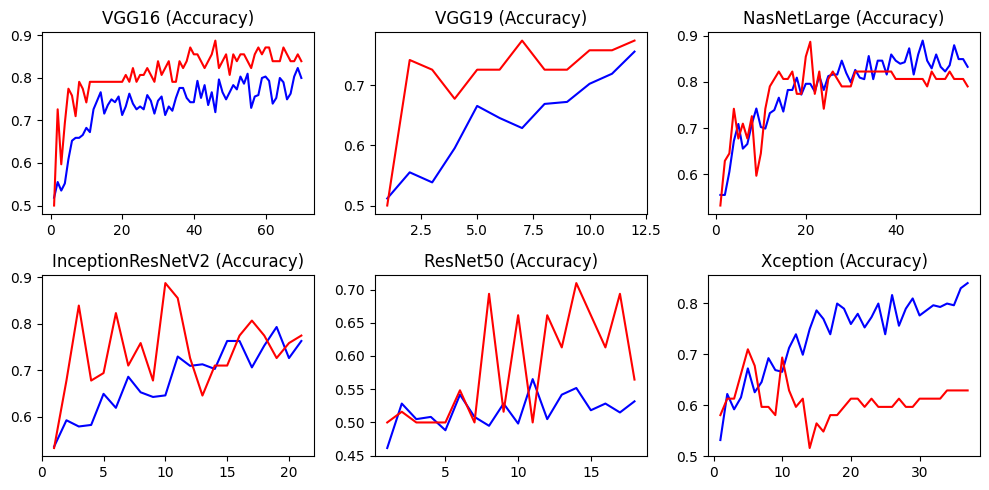

In [ ]:
# Definimos el tamaño de cada figura.
plt.figure(figsize=(10,5))

# Para VGG16
plt.subplot(2, 3, 1)

epochs = range(1, len(VGG16_dg_acc) + 1)

plt.plot(epochs, VGG16_dg_acc, 'b', label='Training acc')
plt.plot(epochs,VGG16_dg_val_acc,'r', label='Validation acc')
plt.title('VGG16 (Accuracy)')

# Para VGG19
plt.subplot(2, 3, 2)

epochs = range(1, len(VGG19_dg_acc) + 1)

plt.plot(epochs, VGG19_dg_acc, 'b', label='Training acc')
plt.plot(epochs,VGG19_dg_val_acc,'r', label='Validation acc')
plt.title('VGG19 (Accuracy)')

# Para NasNetLarge
plt.subplot(2, 3, 3)

epochs = range(1, len(NasNetLarge_dg_acc) + 1)

plt.plot(epochs, NasNetLarge_dg_acc, 'b', label='Training acc')
plt.plot(epochs,NasNetLarge_dg_val_acc,'r', label='Validation acc')
plt.title('NasNetLarge (Accuracy)')

# Para InceptionResNetV2
plt.subplot(2, 3, 4)

epochs = range(1, len(InceptionResNetV2_dg_acc) + 1)

plt.plot(epochs, InceptionResNetV2_dg_acc, 'b', label='Training acc')
plt.plot(epochs,InceptionResNetV2_dg_val_acc,'r', label='Validation acc')
plt.title('InceptionResNetV2 (Accuracy)')

# Para ResNet50
plt.subplot(2, 3, 5)

epochs = range(1, len(ResNet50_dg_acc) + 1)

plt.plot(epochs, ResNet50_dg_acc, 'b', label='Training acc')
plt.plot(epochs,ResNet50_dg_val_acc,'r', label='Validation acc')
plt.title('ResNet50 (Accuracy)')

# Para Xception
plt.subplot(2, 3, 6)

epochs = range(1, len(Xception_dg_acc) + 1)

plt.plot(epochs, Xception_dg_acc, 'b', label='Training acc')
plt.plot(epochs,Xception_dg_val_acc,'r', label='Validation acc')
plt.title('Xception (Accuracy)')

plt.tight_layout()
plt.show()

#### Loss

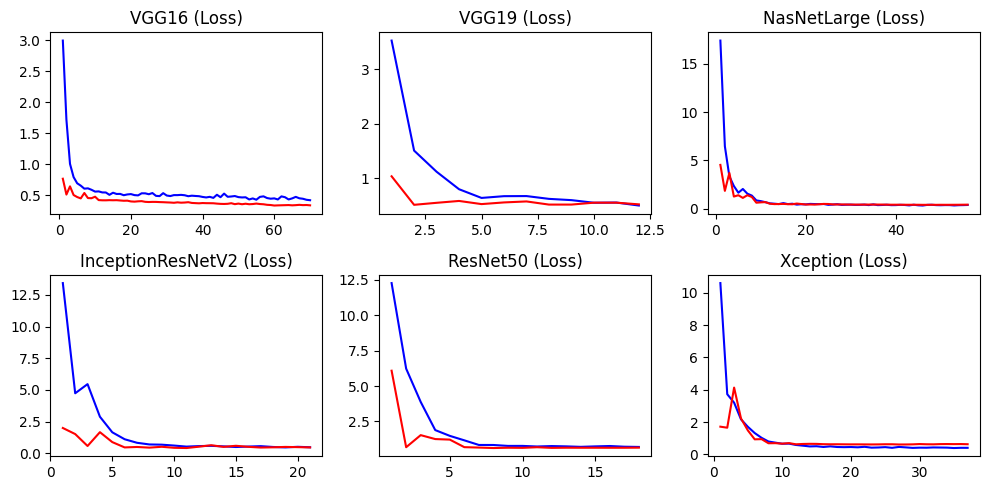

In [ ]:
# Definimos el tamaño de cada figura.
plt.figure(figsize=(10,5))

# Para VGG16
plt.subplot(2, 3, 1)

epochs = range(1, len(VGG16_dg_loss) + 1)

plt.plot(epochs, VGG16_dg_loss, 'b', label='Training loss')
plt.plot(epochs,VGG16_dg_val_loss,'r', label='Validation loss')
plt.title('VGG16 (Loss)')

# Para VGG19
plt.subplot(2, 3, 2)

epochs = range(1, len(VGG19_dg_loss) + 1)

plt.plot(epochs, VGG19_dg_loss, 'b', label='Training loss')
plt.plot(epochs,VGG19_dg_val_loss,'r', label='Validation loss')
plt.title('VGG19 (Loss)')

# Para NasNetLarge
plt.subplot(2, 3, 3)

epochs = range(1, len(NasNetLarge_dg_loss) + 1)

plt.plot(epochs, NasNetLarge_dg_loss, 'b', label='Training loss')
plt.plot(epochs,NasNetLarge_dg_val_loss,'r', label='Validation loss')
plt.title('NasNetLarge (Loss)')

# Para InceptionResNetV2
plt.subplot(2, 3, 4)

epochs = range(1, len(InceptionResNetV2_dg_loss) + 1)

plt.plot(epochs, InceptionResNetV2_dg_loss, 'b', label='Training loss')
plt.plot(epochs,InceptionResNetV2_dg_val_loss,'r', label='Validation loss')
plt.title('InceptionResNetV2 (Loss)')

# Para ResNet50
plt.subplot(2, 3, 5)

epochs = range(1, len(ResNet50_dg_loss) + 1)

plt.plot(epochs, ResNet50_dg_loss, 'b', label='Training loss')
plt.plot(epochs,ResNet50_dg_val_loss,'r', label='Validation loss')
plt.title('ResNet50 (Loss)')

# Para Xception
plt.subplot(2, 3, 6)

epochs = range(1, len(Xception_dg_loss) + 1)

plt.plot(epochs, Xception_dg_loss, 'b', label='Training loss')
plt.plot(epochs,Xception_dg_val_loss,'r', label='Validation loss')
plt.title('Xception (Loss)')

plt.tight_layout()
plt.show()

### Evaluación del modelo

In [ ]:
# Para VGG16
VGG16_dg_test_loss, VGG16_dg_test_acc = VGG16_dg.evaluate(test_generator)

# Para VGG19
VGG19_dg_test_loss, VGG19_dg_test_acc = VGG19_dg.evaluate(test_generator)

# Para NasNetLarge
NasNetLarge_dg_test_loss, NasNetLarge_dg_test_acc = NasNetLarge_dg.evaluate(test_generator)

# Para InceptionResNetV2
InceptionResNetV2_dg_test_loss, InceptionResNetV2_dg_test_acc = InceptionResNetV2_dg.evaluate(test_generator)

# Para ResNet50
ResNet50_dg_test_loss, ResNet50_dg_test_acc = ResNet50_dg.evaluate(test_generator)

# Para Xception
Xception_dg_test_loss, Xception_dg_test_acc = Xception_dg.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - acc: 0.6818 - loss: 0.4930
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - acc: 0.6818 - loss: 0.6606
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - acc: 0.7727 - loss: 0.6429
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - acc: 0.6818 - loss: 0.6493
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - acc: 0.5909 - loss: 0.6610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - acc: 0.5000 - loss: 0.7997


In [ ]:
# Vemos cual ha sido la precisión para cada caso.
print('Precisión para VGG16:', VGG16_dg_test_acc)
print('Precisión para VGG19:', VGG19_dg_test_acc)
print('Precisión para NasNetLarge:', NasNetLarge_dg_test_acc)
print('Precisión para InceptionResNetV2:', InceptionResNetV2_dg_test_acc)
print('Precisión para ResNet50:', ResNet50_dg_test_acc)
print('Precisión para Xception:', Xception_dg_test_acc)

Precisión para VGG16: 0.6818181872367859
Precisión para VGG19: 0.6818181872367859
Precisión para NasNetLarge: 0.7727272510528564
Precisión para InceptionResNetV2: 0.6818181872367859
Precisión para ResNet50: 0.5909090638160706
Precisión para Xception: 0.5


In [ ]:
# Look at confusion matrix
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ["Defective", "Non-Defective"])
    plt.yticks(tick_marks, ["Defective", "Non-Defective"], rotation=45)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.mean()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

#### Conjunto completo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


Text(0.5, 1.0, 'Xception')

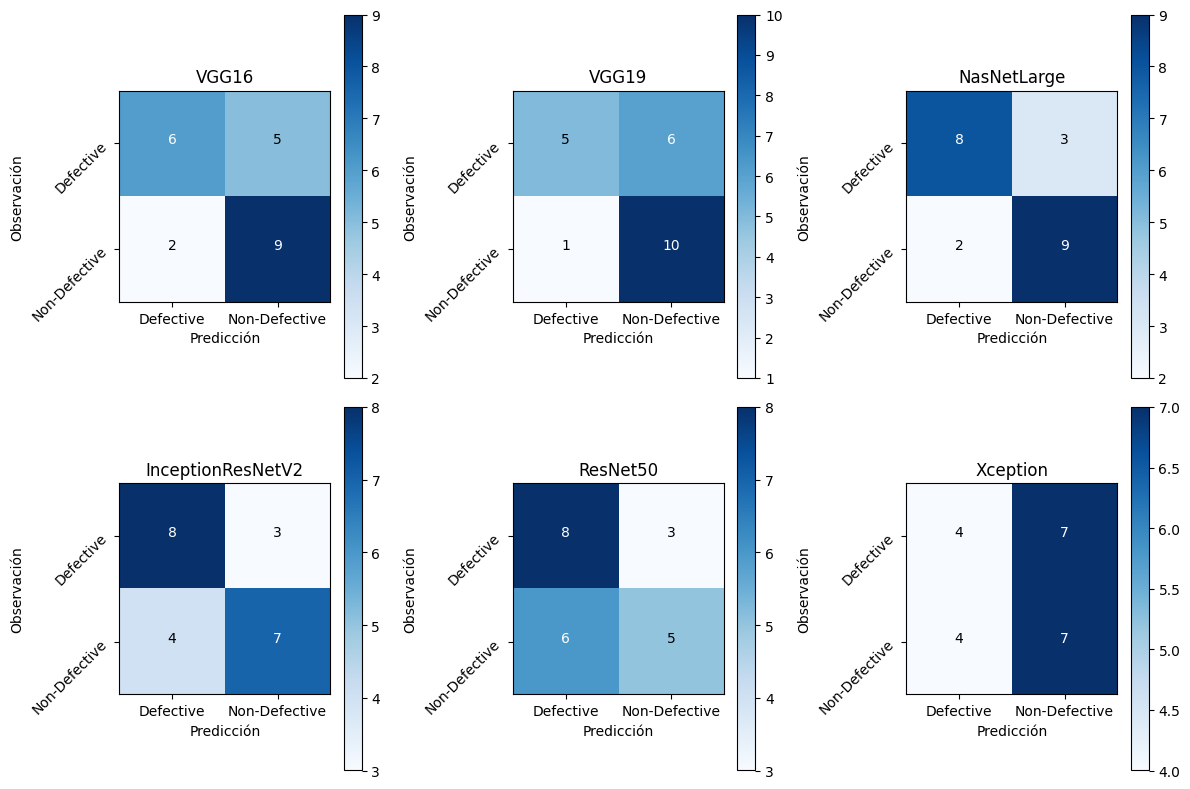

In [ ]:
# Definimos el tamaño de las imagenes
plt.figure(figsize=(12,8))

# Para VGG16

# Predict the values from the validation dataset
Y_pred = VGG16_dg.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 1)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('VGG16')

# Para VGG19

# Predict the values from the validation dataset
Y_pred = VGG19_dg.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 2)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('VGG19')

# Para NasNetLarge

# Predict the values from the validation dataset
Y_pred = NasNetLarge_dg.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 3)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('NasNetLarge')

# Para InceptionResNetV2

# Predict the values from the validation dataset
Y_pred = InceptionResNetV2_dg.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 4)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('InceptionResNetV2')

# Para ResNet50

# Predict the values from the validation dataset
Y_pred = ResNet50_dg.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 5)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('ResNet50')

#Para Xception

# Predict the values from the validation dataset
Y_pred = Xception_dg.predict(test_generator)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis=1)
# Convert validation observations to one hot vectors
Y_true = test_generator.classes
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plt.subplot(2, 3, 6)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plt.title('Xception')